In [1]:
import keras.optimizers
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, losses
from keras.datasets import fashion_mnist
from keras.models import Model
from keras import regularizers

In [2]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu',
                         activity_regularizer=regularizers.l1(10e-5)),
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])


    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [3]:
# Load Dataset

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Model Define
latent_dim = 16
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train
                , epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
autoencoder.evaluate

Epoch 1/10
235/235 [==============================] - 3s 8ms/step - loss: 0.0726 - val_loss: 0.0453
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0386 - val_loss: 0.0340
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0315 - val_loss: 0.0297
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0280 - val_loss: 0.0269
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0257 - val_loss: 0.0249
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0241 - val_loss: 0.0236
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0231 - val_loss: 0.0228
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0225 - val_loss: 0.0223
Epoch 9/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0220 - val_loss: 0.0219
Epoch 10/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0217 - val_loss: 0.0216

<bound method Model.evaluate of <__main__.Autoencoder object at 0x7f0a582dcd90>>

In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

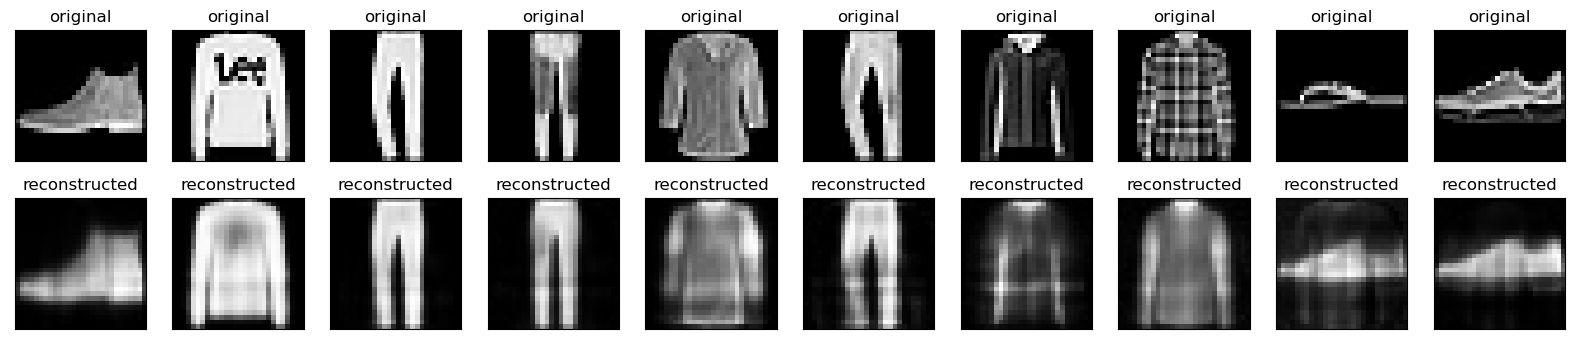

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
